In [88]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv("Alabama.csv", index_col="DATE")
df

,STATION,NAME,STATE,REGION,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,
2008-01-01,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,47.0,64.0,30.0
2008-01-02,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,37.5,48.0,27.0
2008-01-03,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,26.5,34.0,19.0
2008-01-04,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,28.5,39.0,18.0
2008-01-05,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,36.0,53.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,28.5,34.0,23.0
2022-12-28,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,34.5,45.0,24.0
2022-12-29,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,45.0,59.0,31.0


In [90]:
df.isnull().sum()

STATION      0
NAME         0
STATE        0
REGION       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
SNOW         0
SNWD         0
TAVG         0
TMAX         0
TMIN         0
dtype: int64

In [91]:
# Check for missing value defined in data documentation
df.apply(lambda x: (x == 9999).sum())

STATION      0
NAME         0
STATE        0
REGION       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
SNOW         0
SNWD         0
TAVG         0
TMAX         0
TMIN         0
dtype: int64

In [92]:
# Convert 'DATE' to datetime format
df.index = pd.to_datetime(df.index)

In [93]:
df.index

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05', '2008-01-06', '2008-01-07', '2008-01-08',
               '2008-01-09', '2008-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=111873, freq=None)

In [94]:
df1 = df[["PRCP", "SNOW", "SNWD", "TAVG", "TMAX", "TMIN"]]

In [95]:
df1

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,
2008-01-01,0.0,0.0,0.0,47.0,64.0,30.0
2008-01-02,0.0,0.0,0.0,37.5,48.0,27.0
2008-01-03,0.0,0.0,0.0,26.5,34.0,19.0
2008-01-04,0.0,0.0,0.0,28.5,39.0,18.0
2008-01-05,0.0,0.0,0.0,36.0,53.0,19.0
...,...,...,...,...,...,...
2022-12-27,0.0,0.0,0.0,28.5,34.0,23.0
2022-12-28,0.0,0.0,0.0,34.5,45.0,24.0
2022-12-29,0.0,0.0,0.0,45.0,59.0,31.0


In [96]:
# Calculate the mean for each unique date (index)
df1 = df1.groupby(df.index).mean().round(2)

# Print or use the mean_values DataFrame as needed
print(df1)

            PRCP  SNOW  SNWD   TAVG   TMAX   TMIN
DATE                                             
2008-01-01  0.00  0.00  0.00  43.67  56.22  30.46
2008-01-02  0.00  0.00  0.00  32.50  43.38  21.73
2008-01-03  0.00  0.00  0.00  25.70  37.38  15.12
2008-01-04  0.00  0.00  0.00  30.20  42.99  17.18
2008-01-05  0.00  0.00  0.00  39.21  53.59  23.94
...          ...   ...   ...    ...    ...    ...
2022-12-27  0.00  0.18  0.16  33.49  44.79  22.19
2022-12-28  0.00  0.14  0.09  39.99  54.04  25.94
2022-12-29  0.00  0.14  0.09  46.33  62.22  30.44
2022-12-30  0.06  0.12  0.09  57.19  68.63  45.76
2022-12-31  0.46  0.14  0.09  56.86  65.53  48.19

[5479 rows x 6 columns]


In [97]:
variable_dfs = {}
for column in df1.columns:
    variable_dfs[column] = pd.DataFrame(df1[column])

# Accessing individual DataFrames
prcp_df = variable_dfs['PRCP']
snow_df = variable_dfs['SNOW']
snwd_df = variable_dfs['SNWD']
tavg_df = variable_dfs['TAVG']
tmax_df = variable_dfs['TMAX']
tmin_df = variable_dfs['TMIN']


print(tmin_df.head())

             TMIN
DATE             
2008-01-01  30.46
2008-01-02  21.73
2008-01-03  15.12
2008-01-04  17.18
2008-01-05  23.94


In [98]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def preprocess_data(df_1):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_1)


    # Define sequence length and features
    sequence_length = 1  # Number of time steps in each sequence

    # Create sequences and corresponding labels
    sequences = []
    labels = []
    for i in range(len(scaled_data) - sequence_length):
        if (i + sequence_length) < len(scaled_data):
            seq = scaled_data[i:i + sequence_length]
            label = scaled_data[i + sequence_length][0]  # Assuming zero-based indexing
            sequences.append(seq)
            labels.append(label)

    # Convert to numpy arrays
    sequences = np.array(sequences)
    labels = np.array(labels)

    # Split into train and test sets
    train_size = int(0.8 * len(sequences))
    train_x, test_x = sequences[:train_size], sequences[train_size:]
    train_y, test_y = labels[:train_size], labels[train_size:]

    return train_x, train_y, test_x, test_y, scaler

# Define lists to store DataFrames for each dataset
dataframes = [prcp_df, snow_df, snwd_df, tavg_df, tmax_df, tmin_df]

# Define lists to store train and test sets for each dataset
train_sets = []
test_sets = []
scalers = []  # List to store scalers for each dataset

# Loop over each DataFrame
for df_1 in dataframes:
    train_x, train_y, test_x, test_y, scaler = preprocess_data(df_1)
    
    # Store train and test sets for each dataset
    train_sets.append((train_x, train_y))
    test_sets.append((test_x, test_y))
    
    # Store the scaler for this dataset
    scalers.append(scaler)

# Now, you have separate train and test sets for each dataset in train_sets and test_sets,
# and scalers for each dataset in scalers
# You can loop over these lists and build LSTM models separately for each dataset
for name, (train_x, train_y), (test_x, test_y), scaler in zip(variable_dfs.keys(), train_sets, test_sets, scalers):
    print(f"Building LSTM model for dataset: {name}")



Building LSTM model for dataset: PRCP
Building LSTM model for dataset: SNOW
Building LSTM model for dataset: SNWD
Building LSTM model for dataset: TAVG
Building LSTM model for dataset: TMAX
Building LSTM model for dataset: TMIN


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Loop over each dataset
for name, (train_x, train_y), (test_x, test_y) in zip(variable_dfs.keys(), train_sets, test_sets):
    print(f"Building LSTM model for dataset: {name}")
    
    # Get input shape
    input_shape = (train_x.shape[1], train_x.shape[2])
    
    # Create the LSTM model
    lstm_model = create_lstm_model(input_shape)
    
    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f"G:\\Capstone_models\\best_model_weights_{name}.h5", monitor='val_loss', save_best_only=True)

    
    # Train the model
    history = lstm_model.fit(
        train_x, train_y,
        epochs=100,
        batch_size=128,
        validation_split=0.2,  # Use part of the training data as validation
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )
    
    # Evaluate the model
    loss = lstm_model.evaluate(test_x, test_y)
    print(f"Loss for {name}: {loss}")


Building LSTM model for dataset: PRCP
Epoch 1/100
28/28 [==============================] - 13s 83ms/step - loss: 0.8755 - val_loss: 0.8272
Epoch 2/100
28/28 [==============================] - 2s 73ms/step - loss: 0.8315 - val_loss: 0.7865
Epoch 3/100
28/28 [==============================] - 1s 28ms/step - loss: 0.8078 - val_loss: 0.7742
Epoch 4/100
28/28 [==============================] - 1s 35ms/step - loss: 0.8000 - val_loss: 0.7673
Epoch 5/100
28/28 [==============================] - 1s 39ms/step - loss: 0.7984 - val_loss: 0.7607
Epoch 6/100
28/28 [==============================] - 1s 37ms/step - loss: 0.7905 - val_loss: 0.7559
Epoch 7/100
28/28 [==============================] - 1s 39ms/step - loss: 0.7881 - val_loss: 0.7525
Epoch 8/100
28/28 [==============================] - 1s 37ms/step - loss: 0.7879 - val_loss: 0.7501
Epoch 9/100
28/28 [==============================] - 1s 37ms/step - loss: 0.7871 - val_loss: 0.7476
Epoch 10/100
28/28 [==============================] - 1s 35ms

In [100]:
 lstm_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 1, 128)            66560     
                                                                 
 dropout_69 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_70 (LSTM)              (None, 1, 64)             49408     
                                                                 
 dropout_70 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_71 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_71 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)               

In [101]:
import os
import tensorflow as tf

# Define the directory where the best model files are located
model_directory = "G:\\Capstone_models\\"

# Define a list of dataset names
dataset_names = ["PRCP", "SNOW", "SNWD", "TAVG", "TMAX", "TMIN"]

# Loop through each dataset
for name in dataset_names:
    # Define the file path for the best model for this dataset
    model_filepath = os.path.join(model_directory, f"best_model_weights_{name}.h5")
    
    # Load the best model for this dataset
    best_model = tf.keras.models.load_model(model_filepath)
    
    # Get the index corresponding to the current dataset name
    dataset_index = dataset_names.index(name)
    
    # Retrieve the test sets for this dataset
    test_x, test_y = test_sets[dataset_index]
    
    # Evaluate the best model on the test set for this dataset
    test_loss = best_model.evaluate(test_x, test_y)
    print(f"Test Loss for {name}: {test_loss}")


35/35 [==============================] - 3s 6ms/step - loss: 1.2646
Test Loss for PRCP: 1.2646244764328003
35/35 [==============================] - 2s 3ms/step - loss: 0.0657
Test Loss for SNOW: 0.06571419537067413
35/35 [==============================] - 2s 4ms/step - loss: 0.0769
Test Loss for SNWD: 0.07694940268993378
35/35 [==============================] - 3s 6ms/step - loss: 0.0641
Test Loss for TAVG: 0.06412066519260406
35/35 [==============================] - 2s 6ms/step - loss: 0.0790
Test Loss for TMAX: 0.07899652421474457
35/35 [==============================] - 3s 6ms/step - loss: 0.0819
Test Loss for TMIN: 0.08188441395759583


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error  # Corrected import statement

# Initialize lists to store evaluation metrics for each model
all_models_metrics = []

# Loop over each dataset and its corresponding model
for name, (train_x, train_y), (test_x, test_y) in zip(variable_dfs.keys(), train_sets, test_sets):
    print(f"Calculating evaluation metrics for dataset: {name}")
    
    # Load the best model for this dataset
    best_model = tf.keras.models.load_model(f"G:\\Capstone_models\\best_model_weights_{name}.h5")
    
    # Predict temperatures using the trained model
    predictions = best_model.predict(test_x)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(test_y, predictions)
    mse = mean_squared_error(test_y, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test_y, predictions)  # Corrected function call
    
    # Print the evaluation metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    
    # Store the evaluation metrics for this model
    model_metrics = {
        'name': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape  # Include MAPE in stored metrics
    }
    all_models_metrics.append(model_metrics)


Calculating evaluation metrics for dataset: PRCP
35/35 [==============================] - 2s 3ms/step
Mean Absolute Error (MAE): 0.6240721110804093
Mean Squared Error (MSE): 1.264624282016224
Root Mean Squared Error (RMSE): 1.124555148499274
Mean Absolute Percentage Error (MAPE): 565.2337931453756
Calculating evaluation metrics for dataset: SNOW
35/35 [==============================] - 2s 6ms/step
Mean Absolute Error (MAE): 0.08477782917927872
Mean Squared Error (MSE): 0.06571419427442349
Root Mean Squared Error (RMSE): 0.25634779943354985
Mean Absolute Percentage Error (MAPE): 0.18275935135339527
Calculating evaluation metrics for dataset: SNWD
35/35 [==============================] - 2s 6ms/step
Mean Absolute Error (MAE): 0.08327375783624846
Mean Squared Error (MSE): 0.07694939544100513
Root Mean Squared Error (RMSE): 0.2773975404379158
Mean Absolute Percentage Error (MAPE): 0.8012850532196616
Calculating evaluation metrics for dataset: TAVG
35/35 [==============================] - 2

In [103]:
import os
import pickle

# Initialize lists to store results for each model
all_true_temps = []
all_predicted_temps = []

# Create a dictionary to store scalers for each dataset
scalers_dict = dict(zip(dataset_names, scalers))

# Define the directory to save the models and scalers
save_directory = "G:\\Capstone_models_and_scalers\\"

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Loop over each dataset and its corresponding model
for name, (train_x, train_y), (test_x, test_y) in zip(variable_dfs.keys(), train_sets, test_sets):
    print(f"Processing dataset: {name}")
    
    # Load the best model for this dataset
    best_model = tf.keras.models.load_model(f"G:\\Capstone_models\\best_model_weights_{name}.h5")
    
    # Get the scaler for this dataset
    scaler = scalers_dict[name]
    
    # Save the scaler as a pickle file
    scaler_filename = os.path.join(save_directory, f"{name}_scaler.pkl")
    with open(scaler_filename, 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)
    
    # Save the best model for this dataset
    model_filename = os.path.join(save_directory, f"best_model_weights_{name}.h5")
    best_model.save(model_filename)
    
    # Predict temperatures using the trained model
    predictions = best_model.predict(test_x)
    
    # Inverse transform the true and predicted temperatures
    test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
    true_temp = scaler.inverse_transform(test_y_copies)[:, 0]
    
    prediction_copies = np.repeat(predictions, 6, axis=-1)
    predicted_temp = scaler.inverse_transform(prediction_copies)[:, 0]
    
    # Store true and predicted temperatures for this model
    all_true_temps.append(true_temp)
    all_predicted_temps.append(predicted_temp)


Processing dataset: PRCP
35/35 [==============================] - 2s 7ms/step
Processing dataset: SNOW
35/35 [==============================] - 2s 5ms/step
Processing dataset: SNWD
35/35 [==============================] - 2s 4ms/step
Processing dataset: TAVG
35/35 [==============================] - 2s 4ms/step
Processing dataset: TMAX
35/35 [==============================] - 2s 11ms/step
Processing dataset: TMIN
35/35 [==============================] - 2s 6ms/step


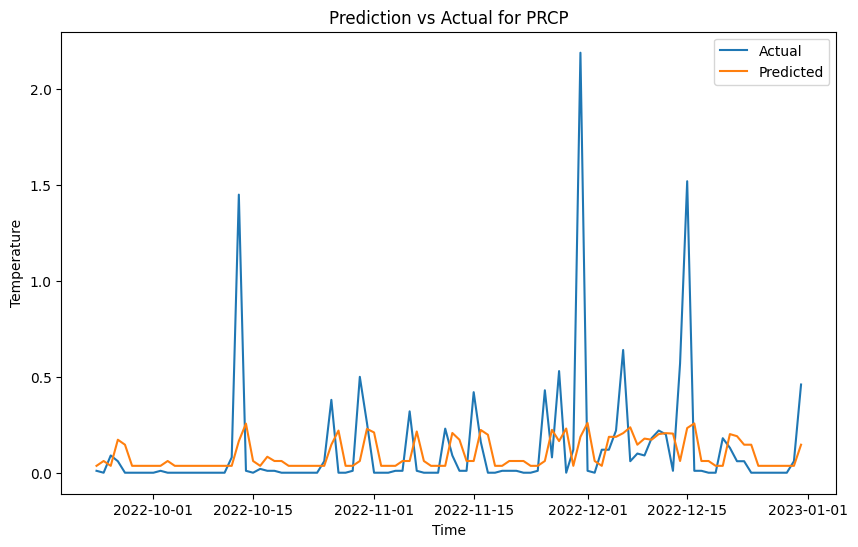

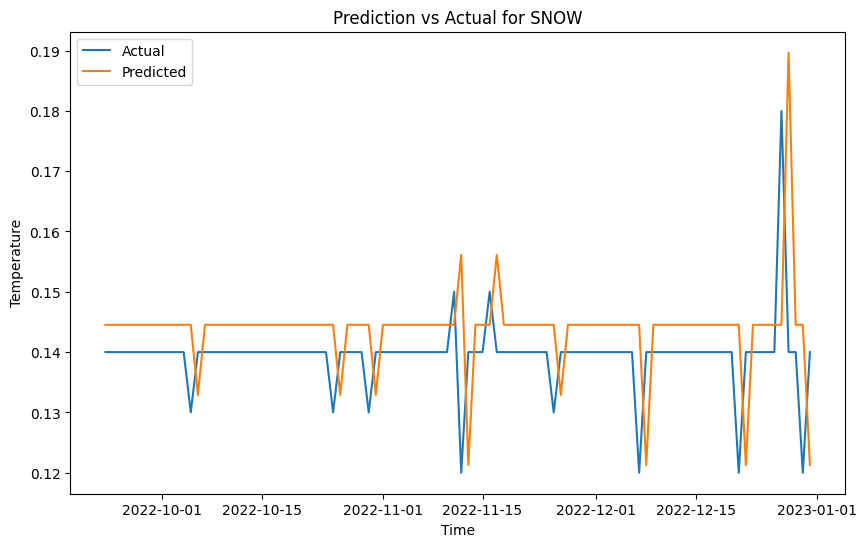

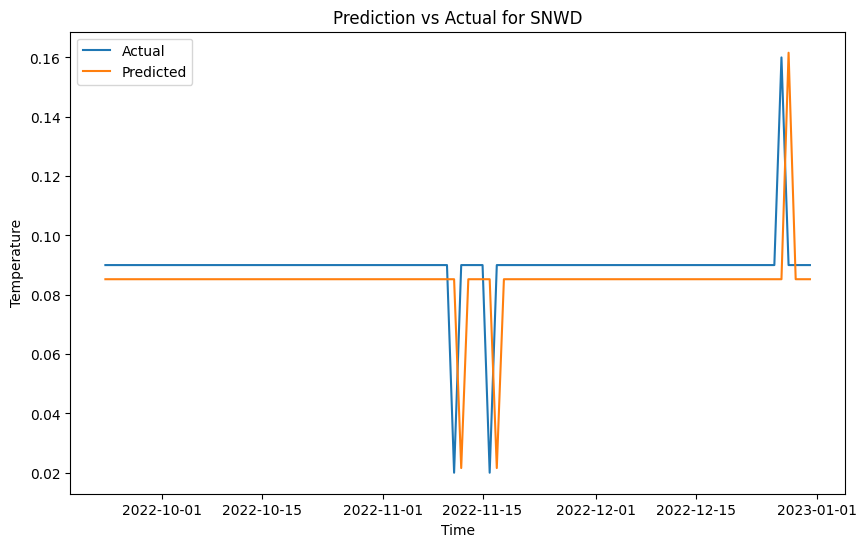

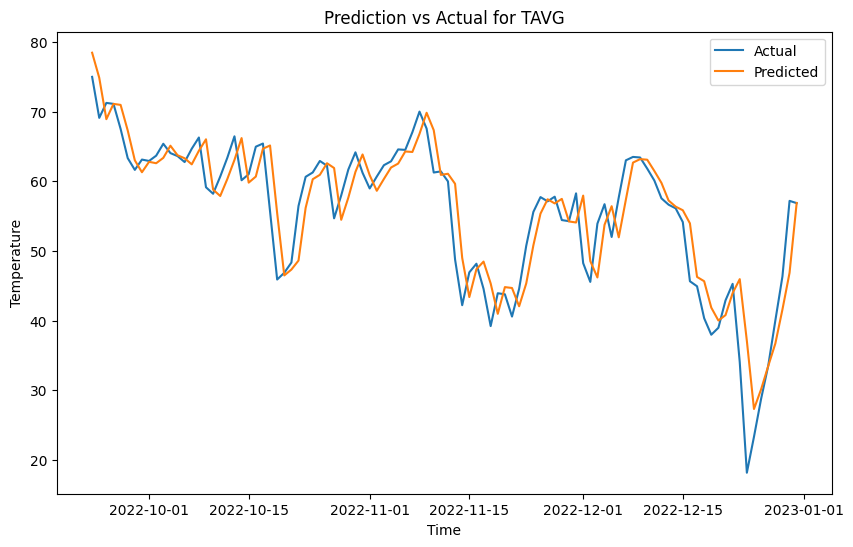

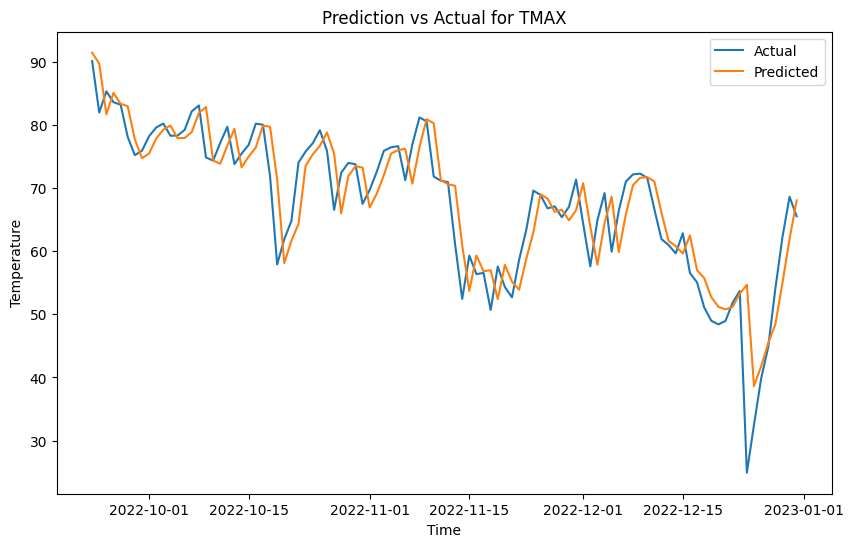

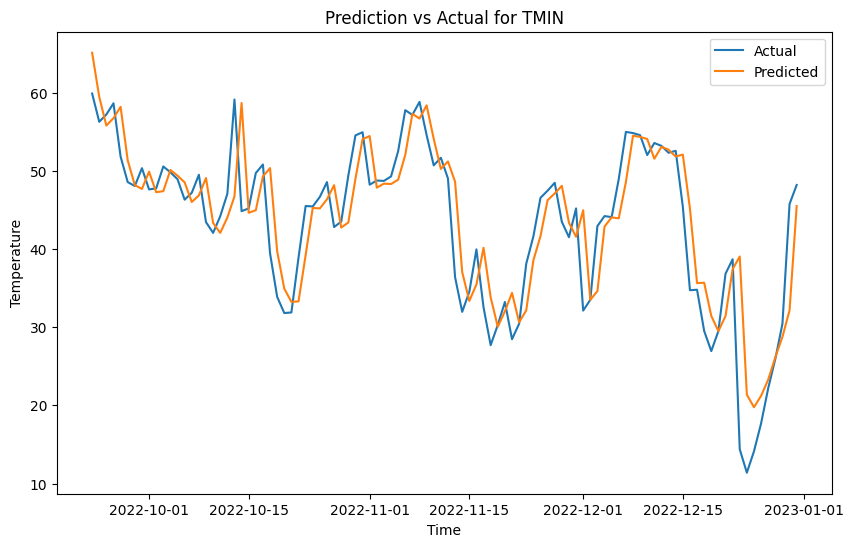

In [104]:
# Plotting predicted and actual temperatures for each dataset
for name, true_temp, predicted_temp in zip(dataset_names, all_true_temps, all_predicted_temps):
    plt.figure(figsize=(10, 6))
    plt.plot(df1.index[-100:], true_temp[-100:], label='Actual')
    plt.plot(df1.index[-100:], predicted_temp[-100:], label='Predicted')
    plt.title(f'Prediction vs Actual for {name}')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()


In [105]:
import os
import pickle
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Function to load scaler from pickle file
def load_scaler(scaler_filepath):
    with open(scaler_filepath, 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
    return scaler

# Define the variables you want to predict
variables = ['PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMIN', 'TMAX']

# Load the scalers for each variable
scaler_prcp = load_scaler("G:\\Capstone_models_and_scalers\\PRCP_scaler.pkl")
scaler_snow = load_scaler("G:\\Capstone_models_and_scalers\\SNOW_scaler.pkl")
scaler_snwd = load_scaler("G:\\Capstone_models_and_scalers\\SNWD_scaler.pkl")
scaler_tavg = load_scaler("G:\\Capstone_models_and_scalers\\TAVG_scaler.pkl")
scaler_tmin = load_scaler("G:\\Capstone_models_and_scalers\\TMIN_scaler.pkl")
scaler_tmax = load_scaler("G:\\Capstone_models_and_scalers\\TMAX_scaler.pkl")

# Load the best models for each variable
model_prcp = load_model("G:\\Capstone_models_and_scalers\\best_model_weights_PRCP.h5")
model_snow = load_model("G:\\Capstone_models_and_scalers\\best_model_weights_SNOW.h5")
model_snwd = load_model("G:\\Capstone_models_and_scalers\\best_model_weights_SNWD.h5")
model_tavg = load_model("G:\\Capstone_models_and_scalers\\best_model_weights_TAVG.h5")
model_tmin = load_model("G:\\Capstone_models_and_scalers\\best_model_weights_TMIN.h5")
model_tmax = load_model("G:\\Capstone_models_and_scalers\\best_model_weights_TMAX.h5")

# Define the start date and end date for the next year
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)

# Define a function to prepare input data for a given date
def prepare_input_data_for_date(date):
    return np.array([[date.timetuple().tm_yday]])

# Function to generate a date range from start_date to end_date
def date_range(start_date, end_date):
    delta = timedelta(days=1)
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        current_date += delta

# Define a dictionary to map variables to their corresponding scalers
scalers = {
    'PRCP': scaler_prcp,
    'SNOW': scaler_snow,
    'SNWD': scaler_snwd,
    'TAVG': scaler_tavg,
    'TMIN': scaler_tmin,
    'TMAX': scaler_tmax
}

# Dictionary to store predicted DataFrames for each variable
predicted_dfs = {}

# Loop through each variable
for variable in variables:
    # Create a list to store predicted values for the current variable for each day of the upcoming year
    predicted_next_year = []

    # Get the corresponding model and scaler for the current variable
    model = None
    scaler = None
    if variable == 'PRCP':
        model = model_prcp
        scaler = scalers['PRCP']
    elif variable == 'SNOW':
        model = model_snow
        scaler = scalers['SNOW']
    elif variable == 'SNWD':
        model = model_snwd
        scaler = scalers['SNWD']
    elif variable == 'TAVG':
        model = model_tavg
        scaler = scalers['TAVG']
    elif variable == 'TMIN':
        model = model_tmin
        scaler = scalers['TMIN']
    elif variable == 'TMAX':
        model = model_tmax
        scaler = scalers['TMAX']

    # Loop through each day of the upcoming year
    for current_date in date_range(start_date, end_date):
        # Prepare input data for the current day
        input_data_for_current_day = prepare_input_data_for_date(current_date)

        # Make predictions for the current day using the appropriate model based on the variable
        predicted_scaled = model.predict(input_data_for_current_day)[0][0]

        # Reverse scale the predicted value
        predicted = scaler.inverse_transform([[predicted_scaled]])[0][0]

        # Append the predicted value for the current day to the list
        predicted_next_year.append((current_date, predicted))

    # Create a DataFrame from the predicted values for the current variable
    predicted_df = pd.DataFrame(predicted_next_year, columns=['Date', variable])

    # Save the predicted DataFrame as a pickle file
    predicted_df.to_pickle(f"G:\\Capstone_models\\predicted_{variable}_next_year.pkl")

    # Store the predicted DataFrame in the dictionary
    predicted_dfs[variable] = predicted_df

    # Print the head of the DataFrame
    print(f"Predicted {variable} for the next year:")
    print(predicted_df.head())


1/1 [==============================] - 0s 29ms/step
Predicted PRCP for the next year:
        Date      PRCP
0 2024-01-01  0.217008
1 2024-01-02  0.232917
2 2024-01-03  0.243277
3 2024-01-04  0.249590
4 2024-01-05  0.253679
1/1 [==============================] - 0s 40ms/step
Predicted SNOW for the next year:
        Date      SNOW
0 2024-01-01  0.216009
1 2024-01-02  0.289977
2 2024-01-03  0.327000
3 2024-01-04  0.345983
4 2024-01-05  0.356816
1/1 [==============================] - 0s 31ms/step
Predicted SNWD for the next year:
        Date      SNWD
0 2024-01-01  0.198625
1 2024-01-02  0.304960
2 2024-01-03  0.380333
3 2024-01-04  0.430558
4 2024-01-05  0.464953
1/1 [==============================] - 0s 25ms/step
Predicted TAVG for the next year:
        Date        TAVG
0 2024-01-01   76.950201
1 2024-01-02   88.896778
2 2024-01-03   97.421511
3 2024-01-04  103.042648
4 2024-01-05  106.664274
1/1 [==============================] - 0s 26ms/step
Predicted TMIN for the next year:
      

In [106]:
# Load the predicted DataFrames from pickle files
predicted_df_prcp = pd.read_pickle("G:\\Capstone_models\\predicted_PRCP_next_year.pkl")
predicted_df_snow = pd.read_pickle("G:\\Capstone_models\\predicted_SNOW_next_year.pkl")
predicted_df_snwd = pd.read_pickle("G:\\Capstone_models\\predicted_SNWD_next_year.pkl")
predicted_df_tavg = pd.read_pickle("G:\\Capstone_models\\predicted_TAVG_next_year.pkl")
predicted_df_tmin = pd.read_pickle("G:\\Capstone_models\\predicted_TMIN_next_year.pkl")
predicted_df_tmax = pd.read_pickle("G:\\Capstone_models\\predicted_TMAX_next_year.pkl")

# Prefix each column with the variable name to make them unique
predicted_df_prcp = predicted_df_prcp.add_prefix('PRCP_')
predicted_df_snow = predicted_df_snow.add_prefix('SNOW_')
predicted_df_snwd = predicted_df_snwd.add_prefix('SNWD_')
predicted_df_tavg = predicted_df_tavg.add_prefix('TAVG_')
predicted_df_tmin = predicted_df_tmin.add_prefix('TMIN_')
predicted_df_tmax = predicted_df_tmax.add_prefix('TMAX_')

# Concatenate all the predicted DataFrames into a single DataFrame
predicted_combined_df = pd.concat([predicted_df_prcp, predicted_df_snow, predicted_df_snwd,
                                   predicted_df_tavg, predicted_df_tmin, predicted_df_tmax], axis=1)

# If 'Date' column does not exist in any DataFrame, create it
if 'Date' not in predicted_combined_df.columns:
    predicted_combined_df['Date'] = pd.date_range(start=start_date, end=end_date)

# Convert the 'Date' column to datetime format
predicted_combined_df['Date'] = pd.to_datetime(predicted_combined_df['Date'])

# Extract the month from the 'Date' column
predicted_combined_df['Month'] = predicted_combined_df['Date'].dt.month

# Group the DataFrame by month and calculate the average for each variable
average_monthly_values = predicted_combined_df.groupby('Month').mean()

# Print or display the average values for each month
print("Average values of each variable for each month:")
print(average_monthly_values)


Average values of each variable for each month:
                PRCP_Date  PRCP_PRCP           SNOW_Date  SNOW_SNOW   
Month                                                                 
1     2024-01-16 00:00:00   0.251178 2024-01-16 00:00:00   0.368052  \
2     2024-02-15 00:00:00   0.246499 2024-02-15 00:00:00   0.382576   
3     2024-03-16 00:00:00   0.246074 2024-03-16 00:00:00   0.381523   
4     2024-04-15 12:00:00   0.246260 2024-04-15 12:00:00   0.381005   
5     2024-05-16 00:00:00   0.246455 2024-05-16 00:00:00   0.380755   
6     2024-06-15 12:00:00   0.246590 2024-06-15 12:00:00   0.380613   
7     2024-07-16 00:00:00   0.246661 2024-07-16 00:00:00   0.380522   
8     2024-08-16 00:00:00   0.246679 2024-08-16 00:00:00   0.380456   
9     2024-09-15 12:00:00   0.246659 2024-09-15 12:00:00   0.380406   
10    2024-10-16 00:00:00   0.246615 2024-10-16 00:00:00   0.380366   
11    2024-11-15 12:00:00   0.246558 2024-11-15 12:00:00   0.380332   
12    2024-12-16 00:00:00   0